# Metody statystyczne zestaw 2
## Autor Paweł Jelonek

### Symulacja procesu Markova
 - $2$ użytkowników
 - $1$ komputer

#### Do komputera zalogowanych może być:
 - $x = 0$(użytkowników)
 - $x = 1$(użytkowników)
 - $x = 2$(użytkowników)

Prawdopodonbieństwo logowania $Plogowania = 0.2$<br>
Prawdopodonbieństwo pozostania niezalogowanym $1 - Plogowania = 0.8$<br>
Prawdopodonbieństwo wylogowania $Pwylogowania = 0.5$<br>
Prawdopodonbieństwo pozostania zalogowanym $1-Pwylogowania = 0.5$<br>



Macierz Przejść $= \left[\begin{array}{ccc}
0.64 & 0.32 & 0.4\\
0.4 & 0.5 & 0.1\\
0.25 & 0.5 & 0.25\\
\end{array}\right]$

In [53]:
from numpy import subtract, random, arange, matrix, subtract, abs
from numpy.linalg import matrix_power, det, solve
from matplotlib import pyplot as plt

### Problem A
### Policzyć $[P]^N$ dla dużych $N$

In [86]:
P = [[0.64, 0.32, 0.04],
            [0.40, 0.50, 0.10],
            [0.25, 0.50, 0.25]]

In [ ]:
T = matrix([[0.5, 0, 0.5],
            [0, 0.25, 0.75],
            [0.5, 0.5, 0]])

In [66]:
power = 100
print(matrix_power(P, power))

[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]


### Kryterium zbieżności $|P^N - P^{N-1}| < 10^{-5}$

In [98]:
def convergence_of_P(N, P):
    y= []
    for n in range(2, N):
        prev_P = matrix_power(P, n-1)
        current_p = matrix_power(P, n)
        y.append(abs(subtract(current_p, prev_P)[1,1]))
    return y

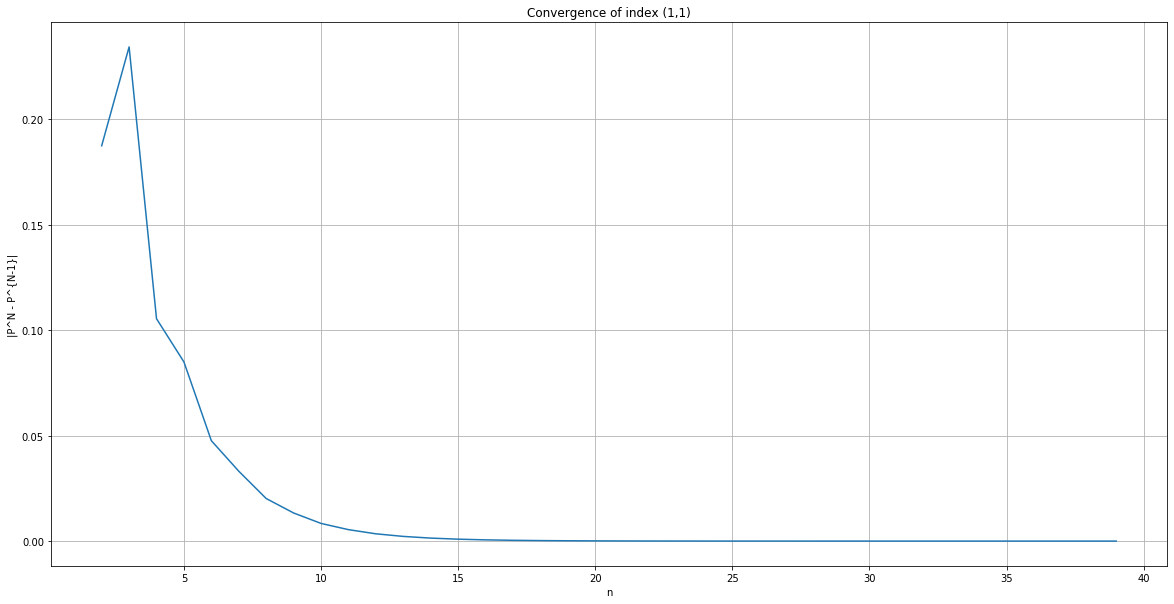

In [101]:
N = 40
y = convergence_of_P(N, T)
plt.grid()
plt.title("Convergence of index (1,1)")
plt.xlabel('n')
plt.ylabel('|P^N - P^{N-1}|')
plt.rcParams["figure.figsize"]=(20, 10)
_ = plt.plot(range(2, N), y)

### Można narysować wykres gdzie:
### $y = [P^n]ij$
### $x = n$

In [102]:
def markov_chain(N, T):
    y = []
    for n in range(1, N):
        tn = matrix_power(T, n)
        y.append(tn[1, 1])
    return y

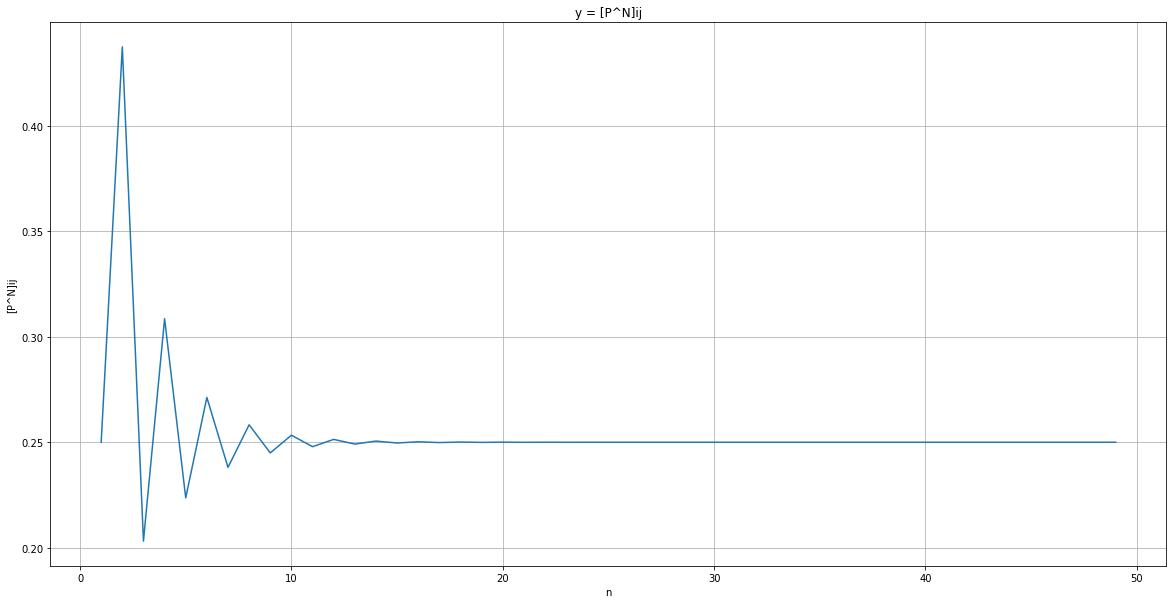

In [103]:
N = 50
y = markov_chain(N, T)

plt.grid()
plt.title("y = [P^N]ij")
plt.xlabel('n')
plt.ylabel('[P^N]ij')
plt.rcParams["figure.figsize"]=(20, 10)
_ = plt.plot(range(1, N), y)

### Problem B

### Start z wybranego węzła $x=0,1,2$
### Losowanie kolejnego węzła zgodnie z $P$
### Przejście do nowego węzła

### Losowanie dla $~N=10^4$
### Policzenie $\pi^{exp}_{i} = N^{i}/N, N^{i}$ - ile razy odwiedzone $x = (0,1,2)$
### Porównanie z $[P]^{N}$, start z $x=(0,1,2)$, zbieżność